In [54]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# load the dataset
DW3_dataset = pd.read_csv('DW3_set_exercise.csv')
DW3_dataset.head(3)

,Unnamed: 0,Patient ID,Diagnosis Code,Date
0,0,4725559.0,E03.9,2020-09-20
1,1,7637008.0,R53.1,2019-10-27
2,2,5068050.0,I48.1,2020-11-22


In [56]:
# check data types
DW3_dataset.dtypes

Unnamed: 0          int64
Patient ID        float64
Diagnosis Code     object
Date               object
dtype: object

In [57]:
# convert patient ID to integer 
DW3_dataset['Patient ID'] = DW3_dataset['Patient ID'].astype('Int64')

In [58]:
# print the first few rows
DW3_dataset.head(3)

,Unnamed: 0,Patient ID,Diagnosis Code,Date
0,0,4725559,E03.9,2020-09-20
1,1,7637008,R53.1,2019-10-27
2,2,5068050,I48.1,2020-11-22


In [59]:
# Check for missing values
missing_values = DW3_dataset.isnull().sum()

print(missing_values) #no missing values found

Unnamed: 0        0
Patient ID        0
Diagnosis Code    0
Date              0
dtype: int64


In [60]:
# Check for null values
nan_values = DW3_dataset.isna().sum()
print(nan_values) # no null values found

Unnamed: 0        0
Patient ID        0
Diagnosis Code    0
Date              0
dtype: int64


In [61]:
# check for duplicates in the dataset
duplicate_counts = {column: DW3_dataset[column].duplicated().sum() for column in DW3_dataset.columns}

print(duplicate_counts)

# Assuming single patient can have multiple diagnoses over time
# Similarly, a specific diagnosis code can apply to many patients, hence the duplicates.

{'Unnamed: 0': 0, 'Patient ID': 15044, 'Diagnosis Code': 40567, 'Date': 39509}


In [62]:
# Question 1.a
# Filter for diabetes cohort
diabetes_codes = ['E08', 'E09', 'E10', 'E11', 'E13']
diabetes_cohort = DW3_dataset[DW3_dataset['Diagnosis Code'].isin(diabetes_codes)]

diabetes_cohort

,Unnamed: 0,Patient ID,Diagnosis Code,Date
13,13,1841379,E10,2021-07-16
15,15,6120921,E09,2020-03-06
19,19,3465224,E09,2021-12-06
29,29,1358532,E10,2019-10-09
36,36,5537348,E11,2022-01-05
...,...,...,...,...
40585,40585,2810484,E13,2019-12-21
40587,40587,5804887,E11,2019-06-28
40595,40595,7160137,E10,2019-11-15
40596,40596,6607308,E08,2021-10-06


In [63]:
# Question 1.a. 
# Listing all unique patient IDs form Diabetes cohort
diabetes_patient_ids_unique = diabetes_cohort['Patient ID'].unique()
print(diabetes_patient_ids_unique)

<IntegerArray>
[1841379, 6120921, 3465224, 1358532, 5537348, 6093014, 5759888, 3063725,
 3118397, 4864445,
 ...
  602235, 4773692, 6601531,  609716,  382372, 4682532, 5804887, 7160137,
 6607308, 1340228]
Length: 4902, dtype: Int64


In [64]:
# Question 1.b. 
#Finding the cardinality of the Diabetes cohort
diabetes_set_cardinality = len(diabetes_patient_ids_unique)
print(diabetes_set_cardinality)

4902


In [65]:
# Question 2.a
# Finding all pa􀆟ents with COVID using the codes

covid_codes = ['U07.1', 'J12.82']

# Filter for COVID-19 cohort
covid_cohort = DW3_dataset[DW3_dataset['Diagnosis Code'].isin(covid_codes)]

covid_cohort

,Unnamed: 0,Patient ID,Diagnosis Code,Date
31,31,5692899,J12.82,2021-11-04
44,44,665176,J12.82,2022-03-11
52,52,3651321,U07.1,2019-10-21
76,76,1282153,J12.82,2022-01-25
91,91,5112391,J12.82,2020-06-04
...,...,...,...,...
40535,40535,1407181,U07.1,2019-11-04
40544,40544,6967147,J12.82,2021-03-09
40553,40553,5331556,J12.82,2020-12-29
40557,40557,5080120,U07.1,2021-05-11


In [66]:
# Question 2.b. Listing all patient IDs for patients with COVID
covid_patient_ids_unique = covid_cohort['Patient ID'].unique()
print(covid_patient_ids_unique)

<IntegerArray>
[5692899,  665176, 3651321, 1282153, 5112391, 6269324, 3112106, 5188223,
 7631428, 2313492,
 ...
 2020943, 5672771, 5524934, 3297566, 1655629, 1407181, 6967147, 5331556,
 5080120, 2398290]
Length: 1997, dtype: Int64


In [67]:
# Question 2.b 
covid_set_cardinality = len(covid_patient_ids_unique)
print(covid_set_cardinality)

1997


In [68]:
# Question 3

# Convert lists to sets for efficient set operations
diabetes_patient_set = set(diabetes_patient_ids_unique)
covid_patient_set = set(covid_patient_ids_unique)

In [69]:
# Question 3.a. Find the intersection of both sets
intersection_set = diabetes_patient_set.intersection(covid_patient_set)
intersection_set

{138575,
 175474,
 222248,
 227866,
 266223,
 270723,
 311557,
 482256,
 597141,
 620359,
 620623,
 626112,
 628441,
 663704,
 665855,
 700390,
 734644,
 788972,
 848666,
 851267,
 942974,
 992024,
 1032811,
 1053804,
 1080874,
 1165591,
 1201084,
 1220613,
 1346682,
 1376904,
 1408551,
 1428367,
 1441531,
 1448346,
 1500368,
 1603639,
 1610879,
 1759825,
 1781822,
 1789370,
 1811725,
 1856152,
 1931212,
 1980087,
 1998501,
 2217126,
 2221314,
 2299370,
 2299669,
 2301586,
 2316131,
 2320798,
 2348772,
 2349833,
 2356742,
 2369658,
 2403848,
 2417040,
 2465811,
 2481330,
 2483513,
 2629565,
 2646629,
 2683802,
 2708536,
 2719049,
 2764472,
 2769295,
 2831596,
 2986113,
 3078792,
 3091854,
 3122196,
 3178905,
 3256234,
 3262537,
 3372511,
 3428304,
 3456061,
 3459970,
 3622244,
 3636206,
 3651321,
 3736791,
 3745418,
 3812286,
 3834471,
 3963360,
 4007167,
 4021777,
 4045442,
 4056916,
 4281623,
 4322839,
 4330450,
 4387401,
 4406239,
 4444155,
 4464616,
 4556617,
 4595704,
 4782266,
 4

In [70]:
# Question3.b.cardinality of the Intersection set

intersection_set_cardinality = len(intersection_set)
print(intersection_set_cardinality)

#The output, 165, signifies that there are 165 individuals within the dataset who have been diagnosed with both conditions

165


In [71]:
# Question 4.a

# Union: Patients with either Diabetes or COVID
union_set = diabetes_patient_set.union(covid_patient_set)
union_set

{3981318,
 1736711,
 7290887,
 4079623,
 1376265,
 4456467,
 6127641,
 1769501,
 3817505,
 5685284,
 7340071,
 4751400,
 6750250,
 6701106,
 2048051,
 5046324,
 2932790,
 1982519,
 3113015,
 3866682,
 3637307,
 7618620,
 5914682,
 3768382,
 5161024,
 6127682,
 2179145,
 6471754,
 5390410,
 6062156,
 7192653,
 7520334,
 1097807,
 4849744,
 4767823,
 4653138,
 999501,
 6717515,
 4030547,
 4472915,
 6471767,
 7225429,
 4210777,
 1425497,
 4341852,
 6815836,
 458846,
 7307359,
 4587614,
 5554274,
 2998371,
 540772,
 7684202,
 6635635,
 1654900,
 5079162,
 1245312,
 6373505,
 1851521,
 7667843,
 5341314,
 6226053,
 5734535,
 7667848,
 1654922,
 1622157,
 3358868,
 3063958,
 1228953,
 4505754,
 6619292,
 4341920,
 1458336,
 4538532,
 6242476,
 5980333,
 3260588,
 6013104,
 2670769,
 6422708,
 6275253,
 7012535,
 6734010,
 3342522,
 196796,
 1212606,
 6881479,
 5456071,
 3162314,
 4128970,
 147663,
 6750421,
 5669085,
 5603550,
 1982688,
 7373028,
 2572517,
 6619368,
 1179884,
 4915448,
 6228

In [72]:
# question 4.b

union_set_cardinality = len(union_set)
print(union_set_cardinality)

# number of patients who have been diagnosed with either Diabetes or COVID

6734


In [73]:
# Question 5.a

! pip install matplotlib-venn 
from matplotlib_venn import venn2

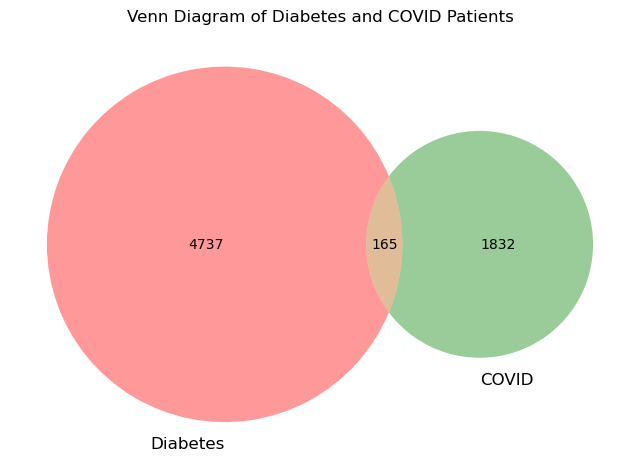

In [74]:
# Question 5.a: Draw the Venn diagram
plt.figure(figsize=(8, 8))
venn2([diabetes_patient_set, covid_patient_set], ('Diabetes', 'COVID'))
plt.title('Venn Diagram of Diabetes and COVID Patients')
plt.show()

## Annotation:

Pink circle: Diabetes only - 4,737.

Green circle: COVID only - 1,832. 

165: The number of patients with both Diabetes and COVID (the intersection area).

"The Union set includes all patients in the Diabetes and COVID circles, totaling 6,734 unique patients."


In [75]:
# Question 6.a
# Find all patients with Diabetes only after they had COVID by listing their patient IDs


# Filter patients who have both conditions
patients_with_both = DW3_dataset[DW3_dataset['Patient ID'].isin(intersection_set)]

# Sort by Patient ID and Date to ensure the dates are in order
patients_with_both_sorted = patients_with_both.sort_values(by=['Patient ID', 'Date'])


# Now group by Patient ID and check if the first occurrence of Diabetes is after the first occurrence of COVID
diabetes_after_covid = patients_with_both_sorted.groupby('Patient ID').apply(lambda df: df[df['Diagnosis Code'].isin(diabetes_codes)]['Date'].min() > df[df['Diagnosis Code'].isin(covid_codes)]['Date'].min())

# List of Patient IDs with Diabetes only after COVID
diabetes_after_covid_patient_ids = diabetes_after_covid[diabetes_after_covid].index.tolist()

diabetes_after_covid_patient_ids

[138575,
 175474,
 222248,
 227866,
 482256,
 620623,
 626112,
 628441,
 663704,
 734644,
 788972,
 1165591,
 1346682,
 1441531,
 1603639,
 1610879,
 1781822,
 1811725,
 1856152,
 2299370,
 2301586,
 2320798,
 2356742,
 2369658,
 2465811,
 2481330,
 2483513,
 2629565,
 2646629,
 2986113,
 3091854,
 3428304,
 3459970,
 3636206,
 3651321,
 4056916,
 4322839,
 4406239,
 4595704,
 4852233,
 4859240,
 4908235,
 4927942,
 5019777,
 5055782,
 5159103,
 5316149,
 5588458,
 5595625,
 5637379,
 5744768,
 5855408,
 5878004,
 5931449,
 6028000,
 6029907,
 6142172,
 6399983,
 6450265,
 6471767,
 6523303,
 6615827,
 7181285,
 7231631,
 7373904,
 7542154,
 7588327,
 7609020,
 7631360,
 7635276]

In [76]:
# Question 6.b 
# Find the cardinality of the Diabetes only after COVID set

diabetes_after_covid_set_cardinality = len(diabetes_after_covid_patient_ids)
print(diabetes_after_covid_set_cardinality)

70


In [77]:
# Question 6.c
# Provide a count breakdown for each of the diabetes codes listed above occurring only after COVID.

# Filter the dataset for patients with diabetes after COVID
diabetes_after_covid_records = DW3_dataset[
    (DW3_dataset['Patient ID'].isin(diabetes_after_covid_patient_ids)) &
    (DW3_dataset['Diagnosis Code'].isin(diabetes_codes))
]

#Count occurrences of each Diabetes code
diabetes_code_counts_after_covid = diabetes_after_covid_records['Diagnosis Code'].value_counts()
print(diabetes_code_counts_after_covid)



Diagnosis Code
E11    17
E13    16
E10    16
E08    13
E09     8
Name: count, dtype: int64
